<a href="https://colab.research.google.com/github/vinaykumar2491/Project_MachineLearning/blob/master/imflash217_fastai_3_camvid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CAMVID: Image Segmentation task:

In [0]:
### Load necessary libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [2]:
path = untar_data(url=URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [0]:
path_labels = path/"labels"
path_images = path/"images"

In [7]:
### Getting the Image files
fnames_images = get_image_files(path_images)
fnames_images[:3]

[PosixPath('/root/.fastai/data/camvid/images/0016E5_08610.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_007170.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f04680.png')]

In [8]:
fnames_labels = get_image_files(path_labels)
fnames_labels[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_02370_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f03630_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_010170_P.png')]

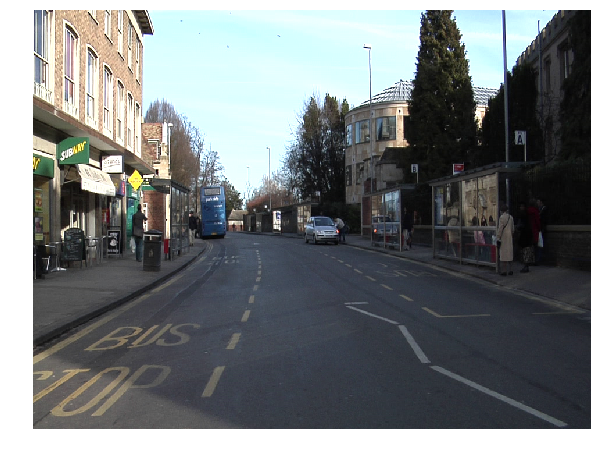

In [9]:
img_f = fnames_images[0]
img = open_image(img_f)
img.show(figsize=(10,10))

In [10]:
img_f.stem

'0016E5_08610'

In [11]:
img_f.suffix

'.png'

In [0]:
### Extracting the labels filenames from corresponding image files
get_y_fn = lambda x: path_labels/f"{x.stem}_P{x.suffix}"

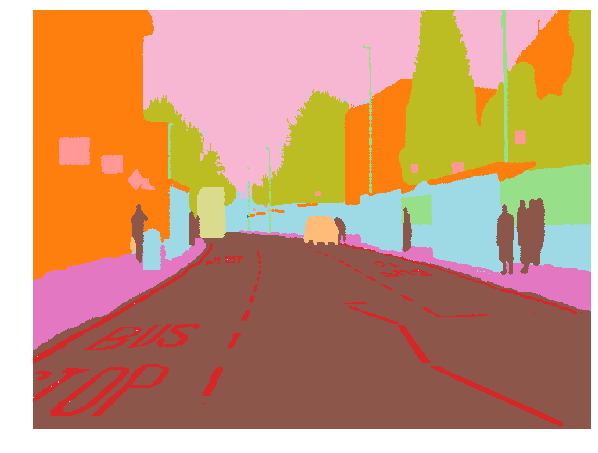

In [15]:
mask = open_mask(fn=get_y_fn(img_f))
mask.show(figsize=(10,10), alpha=1)

In [16]:
mask.shape

torch.Size([1, 720, 960])

In [17]:
img.shape

torch.Size([3, 720, 960])

In [18]:
mask.data

tensor([[[ 4,  4,  4,  ..., 26, 26, 26],
         [ 4,  4,  4,  ..., 26, 26, 26],
         [ 4,  4,  4,  ..., 26, 26, 26],
         ...,
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17],
         [17, 17, 17,  ..., 17, 17, 17]]])

In [19]:
codes = np.loadtxt(fname=path/"codes.txt", dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Datasets

In [22]:
size = np.array(mask.shape[1:])//2
size

array([360, 480])

In [24]:
### Setting the maximum batchsize based on the available RAM
free = gpu_mem_get_free_no_cache()
if free > 8200: bs = 8
else:           bs = 4
print(f"using bs={bs}; have {free}MB of GPU RAM free")

using bs=8; have 11430MB of GPU RAM free


In [28]:
src = (SegmentationItemList.from_folder(path_images)
       .split_by_fname_file(path/"valid.txt")
       .label_from_func(get_y_fn, classes=codes))
src

LabelLists;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Test: None

In [29]:
data = (src.transform(tfms=get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))
data

ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480),Image (3, 360, 480)
y: SegmentationLabelList
ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480),ImageSegment (1, 360, 480)
Path: /root/.fastai/data/camvid/images;

Test: None

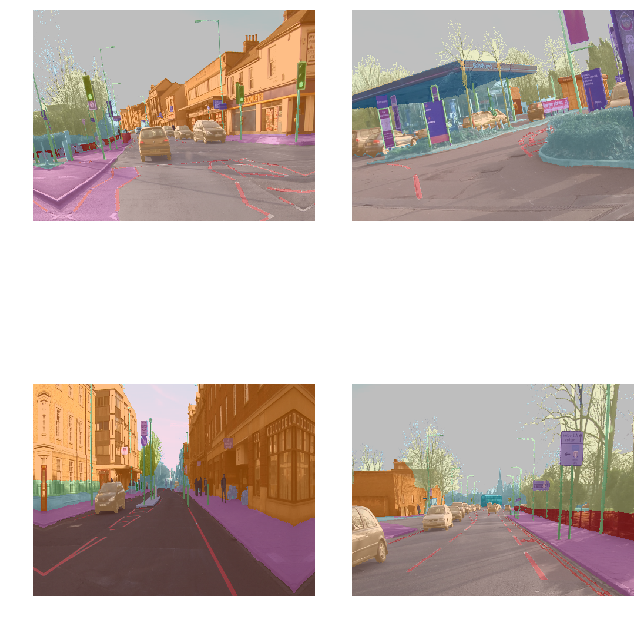

In [32]:
data.show_batch(rows=2, figsize=(9,12))

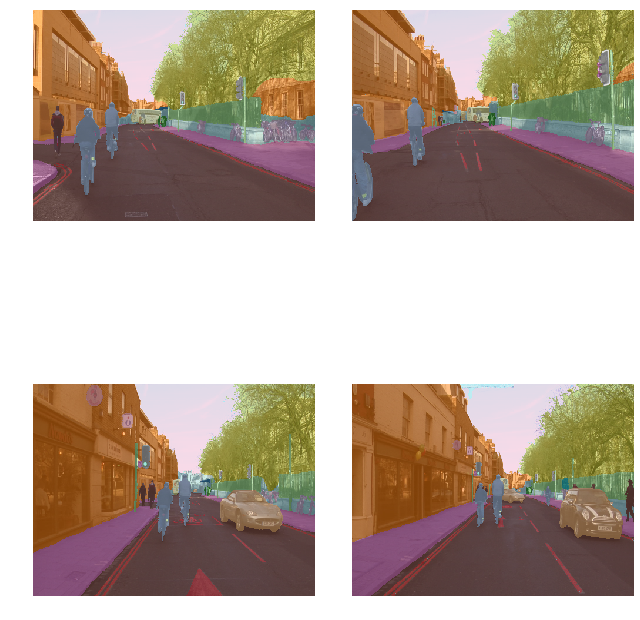

In [34]:
data.show_batch(rows=2, ds_type=DatasetType.Valid, figsize=(9,12))

## Training a model

In [40]:
name2vid = {v:k for k,v in enumerate(codes)}
void_code = name2vid["Void"]

name2vid

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'SUVPickupTruck': 22,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [0]:
def accuracy_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

In [0]:
metrics = accuracy_camvid
wd = 1e-2       ## weight decay lambda

In [45]:
learner = unet_learner(data=data, arch=models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 121MB/s]


In [50]:
learner.lr_find(1e-6, 1e-1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


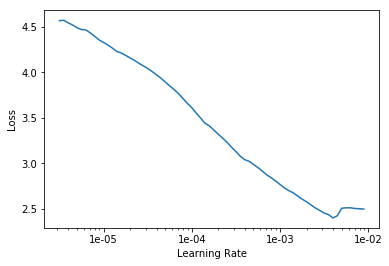

In [51]:
learner.recorder.plot()

In [53]:
learner.fit_one_cycle(cyc_len=5, max_lr=slice(1e-4), pct_start=0.9)

epoch,train_loss,valid_loss,accuracy_camvid,time
0,3.167821,2.251249,0.388463,03:27
1,1.761228,0.998181,0.779768,03:17
2,1.094957,0.770005,0.818278,03:16
3,0.809431,0.627928,0.835326,03:16
4,0.665324,0.541766,0.853758,03:16


In [0]:
learner.save("unet_resnet34_stage1")

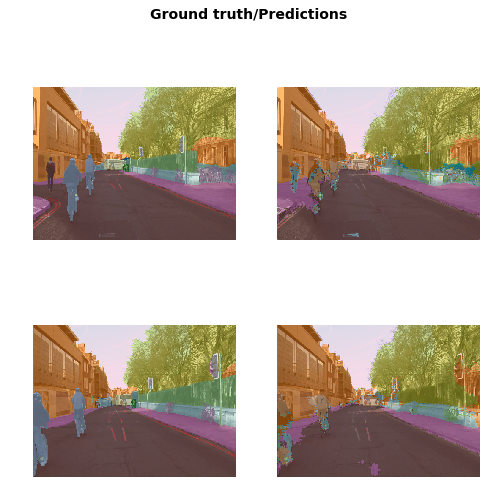

In [57]:
learner.show_results(rows=2)

In [58]:
lr = 1e-4
lrs = slice(lr/400, lr/4)

learner.unfreeze()
learner.fit_one_cycle(cyc_len=2, max_lr=lrs, pct_start=0.8)

epoch,train_loss,valid_loss,accuracy_camvid,time
0,0.569114,0.522530,0.856961,03:24
1,0.555319,0.503192,0.856261,03:24


In [0]:
learner.save("unet_resnet34_stage2")

## Go BIG

In [62]:
learner.destroy()                   ## destroying the learner as to create a new one
size = np.array(mask.shape[1:])     ## using the full original size of the images

free = gpu_mem_get_free_no_cache()
if free > 8200: bs = 3
else:           bs = 1

print(f"free memory = {free};\nbs = {bs}")

this object has been destroyed
free memory = 11101;
bs = 3


In [67]:
##creating the new dataset with new size, bs but using the same src

data = (src.transform(tfms=get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

data

ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Test: None

In [0]:
### creating the leaner as before for the new data
learner = unet_learner(data=data, arch=models.resnet34, metrics=metrics, wd=wd)

In [69]:
learner.load("unet_resnet34_stage2")

Learner(data=ImageDataBunch;

Train: LabelList (600 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Valid: LabelList (101 items)
x: SegmentationItemList
Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960),Image (3, 720, 960)
y: SegmentationLabelList
ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960),ImageSegment (1, 720, 960)
Path: /root/.fastai/data/camvid/images;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


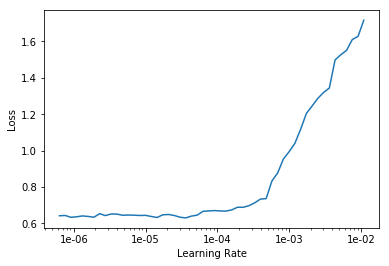

In [70]:
learner.lr_find()
learner.recorder.plot()

In [71]:
lr = 1e-4
learner.fit_one_cycle(cyc_len=4, max_lr=slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,accuracy_camvid,time
0,0.624352,0.562867,0.839627,14:07


RuntimeError: ignored

In [75]:
!nvidia-smi

Thu Oct 10 12:29:59 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.40       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    56W / 149W |  11341MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [73]:
learner.show_results(rows=2)

RuntimeError: ignored

In [74]:
import gc
gc.collect()

7493